In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [26]:
df = pd.read_csv('student_habits_performance.csv')

In [27]:
print('Prep for syntetic data creation utilizign ChatGPT:\n')
print(f'Unique Columns: {df.columns}\n')
print(f'Unique Values: {df.nunique()}\n')

print(f'Data Rows: {len(df)}')
print(f'Data Columns: {len(df.columns)}\n')
print(df['student_id'].unique())

Prep for syntetic data creation utilizign ChatGPT:

Unique Columns: Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

Unique Values: student_id                       1000
age                                 8
gender                              3
study_hours_per_day                78
social_media_hours                 60
netflix_hours                      51
part_time_job                       2
attendance_percentage             320
sleep_hours                        68
diet_quality                        3
exercise_frequency                  7
parental_education_level            3
internet_quality                    3
mental_health_rating               10
extracurricular_par

In [28]:
df2 = pd.read_csv('synthetic_student_extension.csv')

In [29]:
df2.head()

,student_id,library_visits_per_month,caffeine_consumption_mg_per_day
0,S1000,6,395
1,S1001,19,351
2,S1002,14,267
3,S1003,10,190
4,S1004,7,153


In [30]:
data = pd.merge(df, df2, on='student_id', how='left')

In [31]:
for col in data.columns:
    print(col)

print(data.shape)

student_id
age
gender
study_hours_per_day
social_media_hours
netflix_hours
part_time_job
attendance_percentage
sleep_hours
diet_quality
exercise_frequency
parental_education_level
internet_quality
mental_health_rating
extracurricular_participation
exam_score
library_visits_per_month
caffeine_consumption_mg_per_day
(1000, 18)


In [32]:
data.to_excel('synthetic_student_data.xlsx', index=False)

In [33]:
data.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,library_visits_per_month,caffeine_consumption_mg_per_day
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,6,395
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,19,351
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,14,267
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,10,190
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,7,153


In [82]:
thresholds = [100, 90, 80, 70, 60, 50, 40]
previous_avg = None

for score in thresholds:
    avg_hours = data[data['exam_score'] >= score]['study_hours_per_day'].mean()
    if previous_avg is not None:
        diff = avg_hours - previous_avg
        print(f'Avg Study Hours for >= {score}/100: {avg_hours:.2f} (Δ {diff:+.2f} from previous)')
    else:
        print(f'Avg Study Hours for >= {score}/100: {avg_hours:.2f}')
    previous_avg = avg_hours


Avg Study Hours for >= 100/100: 6.24
Avg Study Hours for >= 90/100: 5.64 (Δ -0.60 from previous)
Avg Study Hours for >= 80/100: 5.03 (Δ -0.61 from previous)
Avg Study Hours for >= 70/100: 4.47 (Δ -0.56 from previous)
Avg Study Hours for >= 60/100: 4.13 (Δ -0.34 from previous)
Avg Study Hours for >= 50/100: 3.84 (Δ -0.29 from previous)
Avg Study Hours for >= 40/100: 3.66 (Δ -0.18 from previous)


In [36]:
corr_mat_numeric = data.corr(numeric_only=True)

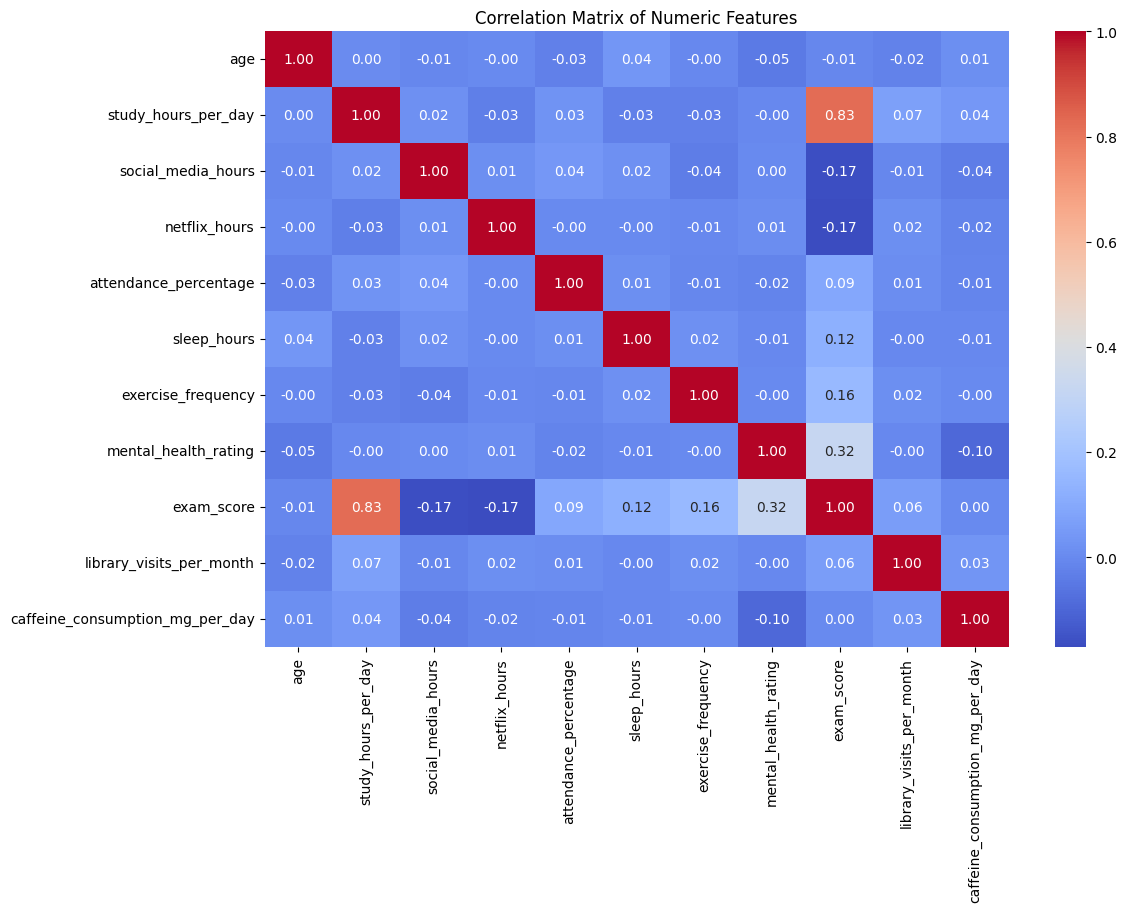

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_mat_numeric, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [38]:
display(data['exam_score'].count())

1000

In [57]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(data['study_hours_per_day'], data['exam_score'])

print('Statistically significant if p-value is greater than 0.05')
print(f'Correlation: {corr:.2f}, Study Hours p-value: {p_value:.4f}')

corr, p_value = pearsonr(data['netflix_hours'], data['exam_score'])
print(f'Correlation: {corr:.2f}, Netflix Hours p-value: {p_value:.4f}')

corr, p_value = pearsonr(data['social_media_hours'], data['exam_score'])
print(f'Correlation: {corr:.2f}, Social Media Hours p-value: {p_value:.4f}')

corr, p_value = pearsonr(data['caffeine_consumption_mg_per_day'], data['exam_score'])
print(f'Correlation: {corr:.2f}, Caffeine Consumption p-value: {p_value:.4f}')

corr, p_value = pearsonr(data['age'], data['exam_score'])
print(f'Correlation: {corr:.2f}, Age p-value: {p_value:.4f}')

corr, p_value = pearsonr(data['sleep_hours'], data['exam_score'])
print(f'Correlation: {corr:.2f}, Sleep Hours p-value: {p_value:.4f}')

corr, p_value = pearsonr(data['exercise_frequency'], data['exam_score'])
print(f'Correlation: {corr:.2f}, Exercise Hours p-value: {p_value:.4f}')

corr, p_value = pearsonr(data['mental_health_rating'], data['exam_score'])
print(f'Correlation: {corr:.2f}, Mental Health Rating p-value: {p_value:.4f}')

corr, p_value = pearsonr(data['attendance_percentage'], data['exam_score'])
print(f'Correlation: {corr:.2f}, Attendance Percentage p-value: {p_value:.4f}')

Statistically significant if p-value is greater than 0.05
Correlation: 0.83, Study Hours p-value: 0.0000
Correlation: -0.17, Netflix Hours p-value: 0.0000
Correlation: -0.17, Social Media Hours p-value: 0.0000
Correlation: 0.00, Caffeine Consumption p-value: 0.9719
Correlation: -0.01, Age p-value: 0.7785
Correlation: 0.12, Sleep Hours p-value: 0.0001
Correlation: 0.16, Exercise Hours p-value: 0.0000
Correlation: 0.32, Mental Health Rating p-value: 0.0000
Correlation: 0.09, Attendance Percentage p-value: 0.0045
